In [0]:
import keras
from keras.models import Sequential,Model
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D,MaxPool2D
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#importing thre datasets from mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

label =  0


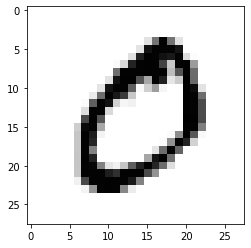

In [16]:
print("label = ",y_train[1])
plt.imshow(x_train[1], cmap='Greys')

In [17]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [18]:
# Reshaping the array to 4-dim as it is binary image
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing as mostly neural networks inputs is between 0-1 
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# let try with a Simple model
input_shape=(28,28,1)
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test,y_test), verbose=1)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 31s 517us/step - loss: 0.1839 - acc: 0.9418 - val_loss: 0.0905 - val_acc: 0.9700
Epoch 2/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0730 - acc: 0.9773 - val_loss: 0.0452 - val_acc: 0.9860
Epoch 3/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.0553 - acc: 0.9829 - val_loss: 0.0260 - val_acc: 0.9914
Epoch 4/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0482 - acc: 0.9851 - val_loss: 0.0209 - val_acc: 0.9928
Epoch 5/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0415 - acc: 0.9873 - val_loss: 0.0271 - val_acc: 0.9913
Epoch 6/10
60000/60000 [======

In [11]:
model.evaluate(x_test, y_test)
#loss and accuracy

10000/10000 [==============================] - 1s 70us/step


[0.021258249162261926, 0.9928]

In [10]:
#But this model has too many parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

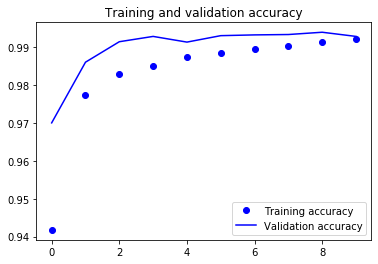

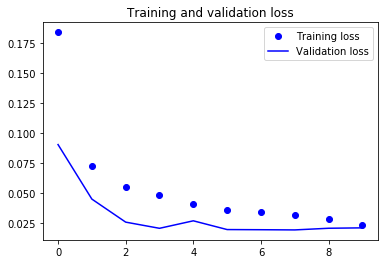

In [12]:
#lets check the plot for accuracy and losses
val_accuracy = history.history['val_acc']
accuracy = history.history['acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
#Now builds our model with very less parameters 
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import concatenate


inputs = Input(shape=(28,28,1))
lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(inputs)
lay1=Conv2D(2,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay1)
lay1=Conv2D(2,kernel_size=(1,1),activation='relu',padding='same')(lay1)
lay1=MaxPooling2D(pool_size=(7,7),strides=(2,2),padding='same')(lay1)
lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(inputs)
lay2=Conv2D(4,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay2)
lay2=Conv2D(4,kernel_size=(1,1),activation='relu',padding='same')(lay2)
lay2=MaxPooling2D(pool_size=(7,7),strides=(2,2),padding='same')(lay2)
lay3=Conv2D(7,kernel_size=(1,1),activation='relu',padding='same')(inputs)
lay3=Conv2D(7,kernel_size=(7,7),strides=(2,2),activation='relu',padding='same')(lay3)
lay3=Conv2D(7,kernel_size=(1,1),activation='relu',padding='same')(lay3)
lay3=MaxPooling2D(pool_size=(7,7),strides=(2,2),padding='same')(lay3)
fc=concatenate([lay1,lay2,lay3])
fc=Flatten()(fc)
fc=Dense(10,activation='relu')(fc)
outputs=Dense(10,activation='softmax')(fc)
model=Model(input=inputs,output=outputs)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test,y_test), verbose=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 241us/step - loss: 0.3964 - acc: 0.8748 - val_loss: 0.1469 - val_acc: 0.9516
Epoch 2/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.1188 - acc: 0.9637 - val_loss: 0.0801 - val_acc: 0.9759
Epoch 3/15
60000/60000 [==============================] - 13s 223us/step - loss: 0.0927 - acc: 0.9711 - val_loss: 0.0725 - val_acc: 0.9763
Epoch 4/15
60000/60000 [==============================] - 13s 223us/step - loss: 0.0788 - acc: 0.9758 - val_loss: 0.0688 - val_acc: 0.9778
Epoch 5/15
60000/60000 [==============================] - 13s 222us/step - loss: 0.0702 - acc: 0.9779 - val_loss: 0.0488 - val_acc: 0.9846
Epoch 6/15
60000/60000 [==============================] - 13s 221us/step - loss: 0.0643 - acc: 0.9799 - val_loss: 0.0574 - val_acc: 0.9821
Epoch 7/15
60000/60000 [==============================] - 13s 216us/step - loss: 0.0581 - acc: 0.9816 - val_loss: 0.

In [23]:
#See it has very less parameters <=10,000
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 28, 28, 2)    4           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 28, 28, 4)    8           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 28, 28, 7)    14          input_3[0][0]                    
____________________________________________________________________________________________

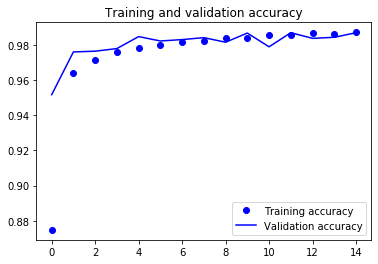

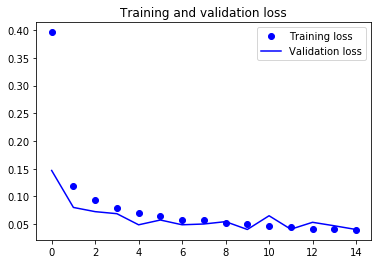

In [24]:
#lets check the plot for accuracy and losses
val_accuracy = history.history['val_acc']
accuracy = history.history['acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()